## Load keypoints

In [2]:
from pycocotools.coco import COCO
## install coco library https://github.com/pdollar/coco
from collections import namedtuple
import numpy as np
from numpy import ma
import math
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib
import pylab
import json
import time

from numpy import linalg as LA
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## load keypoints json jointall=[
annFile = '/data/datasets/COCO/person_keypoints_trainval2014/person_keypoints_train2014.json' # keypoint file
trainimagepath = '/data/guest_users/liangdong/liangdong/practice_demo/train2014/'             # train image path

coco = COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
jointall=[]


loading annotations into memory...
Done (t=5.43s)
creating index...
index created!


In [10]:
len(imgIds)

45174

In [11]:
cats

[{u'id': 1,
  u'keypoints': [u'nose',
   u'left_eye',
   u'right_eye',
   u'left_ear',
   u'right_ear',
   u'left_shoulder',
   u'right_shoulder',
   u'left_elbow',
   u'right_elbow',
   u'left_wrist',
   u'right_wrist',
   u'left_hip',
   u'right_hip',
   u'left_knee',
   u'right_knee',
   u'left_ankle',
   u'right_ankle'],
  u'name': u'person',
  u'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]],
  u'supercategory': u'person'}]

In [91]:
imgsequence = 4
img = coco.loadImgs(imgIds[imgsequence])[0]
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [92]:
img

{u'coco_url': u'http://mscoco.org/images/393224',
 u'date_captured': u'2013-11-18 02:29:39',
 u'file_name': u'COCO_train2014_000000393224.jpg',
 u'flickr_url': u'http://farm9.staticflickr.com/8503/8356977703_647d20f05c_z.jpg',
 u'height': 640,
 u'id': 393224,
 u'license': 2,
 u'width': 427}

In [93]:
len(anns)

5

In [94]:
anns[0]['bbox']

[1.44, 37.39, 424.27, 602.61]

In [95]:
anns[1]['bbox']

[68.42, 124.92, 69.7, 104.07]

In [96]:
anns[2]['bbox']

[3.51, 173.18, 90.95, 109.35]

In [97]:
anns[3]['bbox']

[0, 130.16, 72.07, 67.96]

In [98]:
anns[4]['bbox']

[350.97, 163.03, 76.03, 246.96]

In [99]:
trainimagepath + img['file_name']

u'/data/guest_users/liangdong/liangdong/practice_demo/train2014/COCO_train2014_000000393224.jpg'

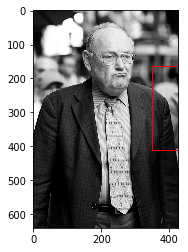

In [100]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Create figure and axes
fig,ax = plt.subplots(1)

cimage = cv.imread(trainimagepath + img['file_name'])

# Display the image
ax.imshow(cimage[:, :, [2, 1, 0]])

for i in range(4,5):
    # Create a Rectangle patch
    rect = patches.Rectangle(
        (anns[i]['bbox'][0], anns[i]['bbox'][1]),
         anns[i]['bbox'][2], anns[i]['bbox'][3],
        linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [101]:
img

{u'coco_url': u'http://mscoco.org/images/393224',
 u'date_captured': u'2013-11-18 02:29:39',
 u'file_name': u'COCO_train2014_000000393224.jpg',
 u'flickr_url': u'http://farm9.staticflickr.com/8503/8356977703_647d20f05c_z.jpg',
 u'height': 640,
 u'id': 393224,
 u'license': 2,
 u'width': 427}

In [109]:
anns[1]['bbox'][0]

68.42

### seg = anns[0]['segmentation']
poly = zip(seg[0][0:nlen+2:2], seg[0][1:nlen+1:2])
polygon_array = create_polygon([ny, nx], vertices)

In [166]:
from PIL import Image, ImageDraw
nx, ny = img['width'], img['height']

maskall = np.zeros((ny, nx))

for i in range(len(anns)):
    seg = anns[i]['segmentation']
    if len(seg) > 0:
        nlen = len(seg[0])
        if nlen > 5:
            poly = zip(seg[0][0:nlen+2:2], seg[0][1:nlen+1:2])
            image = Image.new("L", [nx, ny], 0)
            ImageDraw.Draw(image).polygon(poly, outline=i+1, fill=i+1)
            mask = np.array(image)
            maskall = mask + maskall

maskarray = np.zeros((ny, nx), dtype=np.float)
for i in range(len(anns)):
    maskarray[maskall==i+1] = anns[i]['bbox'][0]

In [169]:
maskarray.max()

350.97000000000003

In [186]:
anns[0]['bbox'][1]

37.39

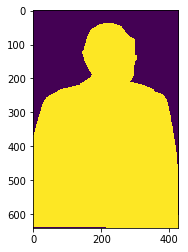

In [187]:
plt.imshow(maskarray==anns[0]['bbox'][0])

In [ ]:
new_width = xmax - xmin
new_height = ymax - ymin
offset_x = 0 - xmin
offset_y = 0 - ymin

In [ ]:
nx, ny = meta['img_width'], meta['img_height']
maskall = np.zeros((ny, nx))

try: 
    if(len(meta['segmentations']) > 0):
        for i in range(len(meta['segmentations'])): 
                seg = meta['segmentations'][i]
                if len(seg) > 0:
                    nlen = len(seg[0])
                    if nlen > 5:
                        poly = zip(seg[0][0:nlen+2:2], seg[0][1:nlen+1:2])
                        img = Image.new("L", [nx, ny], 0)
                        ImageDraw.Draw(img).polygon(poly, outline=1, fill=1)
                        mask = np.array(img)
                        maskall = np.logical_or(mask, maskall)
    except:
        print 'full mask'
    
    return np.logical_not(maskall)

## Transform data format from coco to real_time_pose 

In [2]:
count = 1
joint_all = dict()
numimgs = len(imgIds)

for i in range(0, numimgs):
    #print('----image: '+str(imgIds[i])+' ---------------')
    img = coco.loadImgs(imgIds[i])[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    height = img['height']
    width = img['width']
    #print (height, width)
    prev_center = list(list())
    
    segmentations = list()
    
    for j in range(len(anns)):
        if anns[j]['num_keypoints']<5 or anns[j]['area']<32*32:
            segmentations.append(anns[j]['segmentation'])
            
    for j in range(len(anns)):
        
        ## remove those persons whose keypoints are too small
        if anns[j]['num_keypoints']<5 or anns[j]['area']<32*32:
            continue
        
        person_center = [anns[j]['bbox'][0] + anns[j]['bbox'][2]/2,
                         anns[j]['bbox'][1] + anns[j]['bbox'][3]/2]
        flag = 0
        isValidation = 0 
        
        for k in range(len(prev_center)):
            dist1 = prev_center[k][0] - person_center[0]
            dist2 = prev_center[k][1] - person_center[1]
            #print dist1, dist2
            if dist1*dist1+dist2*dist2 < prev_center[k][2]*0.3:
                flag = 1
                continue
                
        currentjoin={'isValidation': isValidation,
                     'img_paths': trainimagepath + img['file_name'],
                     'objpos': person_center,
                     'image_id': img['id'],
                     'bbox': anns[j]['bbox'],
                     'img_width': width,
                     'img_height': height,
                     'segment_area': anns[j]['area'],
                     'num_keypoints': anns[j]['num_keypoints'],
                     'joint_self': np.zeros((17,3)).tolist(),
                     'scale_provided': anns[j]['bbox'][3]/368.0,
                     'segmentations': segmentations,
                     'joint_others': {},
                     'annolist_index': i ,
                     'people_index': j,
                     'numOtherPeople':0,
                     'scale_provided_other':{},
                     'objpos_other':{},
                     'bbox_other':{},
                     'segment_area_other':{},
                     'num_keypoints_other':{}
                    }    
        
        for part in range(17):
            currentjoin['joint_self'][part][0] = anns[j]['keypoints'][part*3]
            currentjoin['joint_self'][part][1] = anns[j]['keypoints'][part*3+1]
            # 2 means cropped, 0 means occluded by still on image
            if(anns[j]['keypoints'][part*3+2] == 2):
                currentjoin['joint_self'][part][2] = 1
            elif(anns[j]['keypoints'][part*3+2] == 1):
                currentjoin['joint_self'][part][2] = 0                
            else:
                currentjoin['joint_self'][part][2] = 2
            
        count_other = 1
        
        currentjoin['joint_others'] ={}
       
        for k in range(len(anns)):
            
            if k==j or anns[k]['num_keypoints']==0:
                continue
                
            annop = anns[k]
            
            currentjoin['scale_provided_other'][count_other] = annop['bbox'][3]/368
            currentjoin['objpos_other'][count_other] = [annop['bbox'][0]+annop['bbox'][2]/2, 
                                        annop['bbox'][1]+annop['bbox'][3]/2]
            currentjoin['bbox_other'][count_other] = annop['bbox']
            currentjoin['segment_area_other'][count_other] = annop['area']
            currentjoin['num_keypoints_other'][count_other] = annop['num_keypoints']
            
            currentjoin['joint_others'][count_other] = np.zeros((17,3)).tolist()
            
            for part in range(17):
                currentjoin['joint_others'][count_other][part][0] = annop['keypoints'][part*3]
                currentjoin['joint_others'][count_other][part][1] = annop['keypoints'][part*3+1]
                
                if(annop['keypoints'][part*3+2] == 2):
                    currentjoin['joint_others'][count_other][part][2] = 1
                elif(annop['keypoints'][part*3+2] == 1):
                    currentjoin['joint_others'][count_other][part][2] = 0
                else:
                    currentjoin['joint_others'][count_other][part][2] = 2
                
              
            currentjoin['numOtherPeople'] = len(currentjoin['joint_others'])
                    
            count_other = count_other + 1
                        
        prev_center.append([person_center[0], person_center[1],
                            max(anns[j]['bbox'][2], anns[j]['bbox'][3])])
        
    joint_all[i] = currentjoin
    
    count = count + 1

## all joints length

In [3]:
print len(joint_all)

45174


## Write json file

In [4]:
with open('data.json', 'w') as f:
     json.dump(joint_all, f)

## Reading data back

In [12]:
with open('data.json', 'r') as f:
     data = json.load(f)

In [13]:
len(data)

45174

In [7]:
data['13054']

{u'annolist_index': 13054,
 u'bbox': [224.36, 27.42, 255.64, 408.45],
 u'bbox_other': {},
 u'image_id': 34865,
 u'img_height': 640,
 u'img_paths': u'/data/guest_users/liangdong/liangdong/practice_demo/train2014/COCO_train2014_000000034865.jpg',
 u'img_width': 480,
 u'isValidation': 0,
 u'joint_others': {},
 u'joint_self': [[284, 113, 0],
  [284, 85, 1],
  [0, 0, 2],
  [315, 74, 1],
  [0, 0, 2],
  [342, 146, 1],
  [398, 113, 1],
  [329, 245, 1],
  [0, 0, 2],
  [268, 314, 1],
  [0, 0, 2],
  [394, 313, 1],
  [434, 301, 1],
  [367, 449, 0],
  [0, 0, 2],
  [0, 0, 2],
  [0, 0, 2]],
 u'numOtherPeople': 0,
 u'num_keypoints': 10,
 u'num_keypoints_other': {},
 u'objpos': [352.18, 231.64499999999998],
 u'objpos_other': {},
 u'people_index': 0,
 u'scale_provided': 1.1099184782608695,
 u'scale_provided_other': {},
 u'segment_area': 56051.8268,
 u'segment_area_other': {},
 u'segmentations': []}

In [8]:
data['13054']

{u'annolist_index': 13054,
 u'bbox': [224.36, 27.42, 255.64, 408.45],
 u'bbox_other': {},
 u'image_id': 34865,
 u'img_height': 640,
 u'img_paths': u'/data/guest_users/liangdong/liangdong/practice_demo/train2014/COCO_train2014_000000034865.jpg',
 u'img_width': 480,
 u'isValidation': 0,
 u'joint_others': {},
 u'joint_self': [[284, 113, 0],
  [284, 85, 1],
  [0, 0, 2],
  [315, 74, 1],
  [0, 0, 2],
  [342, 146, 1],
  [398, 113, 1],
  [329, 245, 1],
  [0, 0, 2],
  [268, 314, 1],
  [0, 0, 2],
  [394, 313, 1],
  [434, 301, 1],
  [367, 449, 0],
  [0, 0, 2],
  [0, 0, 2],
  [0, 0, 2]],
 u'numOtherPeople': 0,
 u'num_keypoints': 10,
 u'num_keypoints_other': {},
 u'objpos': [352.18, 231.64499999999998],
 u'objpos_other': {},
 u'people_index': 0,
 u'scale_provided': 1.1099184782608695,
 u'scale_provided_other': {},
 u'segment_area': 56051.8268,
 u'segment_area_other': {},
 u'segmentations': []}